In [1]:
.libPaths()

[1] "/root/miniconda3/envs/Rdoc/lib/R/library"

In [7]:
library(monocle)

In [8]:
setwd('/import/DB/zhang//data')
sce = readRDS('OS.final.rds')

In [9]:
library(Seurat)

In [10]:
Idents(sce) = 'celltype'
table(sce$celltype)
sce  = subset(sce,idents = c('OBs','OS1','OS2','BMSC'))


  Adipocyte        BMSC        MSCs         OBs         OS1         OS2 
       1894        1716        3359        2909        4928        4448 
chondrocyte 
        290 

In [52]:
immune.combined = sce

In [53]:
library(harmony)
DefaultAssay(immune.combined) = 'RNA'

In [55]:
set.seed(2211)

In [56]:
sceList <- SplitObject(immune.combined, split.by = "orig.ident")

In [57]:
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])
DefaultAssay(single.ob) = 'RNA'
scRNA_harmony = single.ob
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:30)
##作图
#group_by_cluster
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.2)
options(repr.plot.width = 12,repr.plot.height = 8)
table(scRNA_harmony$group)
options(repr.plot.width = 8,repr.plot.height = 6)

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
 16.817   6.764  15.000 

13:38:58 UMAP embedding parameters a = 0.9922 b = 1.112

13:38:58 Read 14001 rows and found 30 numeric columns

13:38:58 Using Annoy for neighbor search, n_neighbors = 30

13:38:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:39:00 Writing NN index file to temp file /tmp/Rtmp7Fuw7k/fileaaf34a8af2d0

13:39:00 Searching Annoy index using 1 thread, search_k = 3000

13:39:03 Annoy recall = 100%

13:39:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:39:09 Initializing from normalized Laplacian + noise (using irlba)

13:39:10 Commencing optimization for 200 epochs, with 603686 positive edges

13:39:25 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14001
Number of edges: 532627

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9503
Number of communities: 6
Elapsed time: 4 seconds



     OS control 
  12788    1213 

In [58]:
sce = scRNA_harmony


     OS control 
  12788    1213 

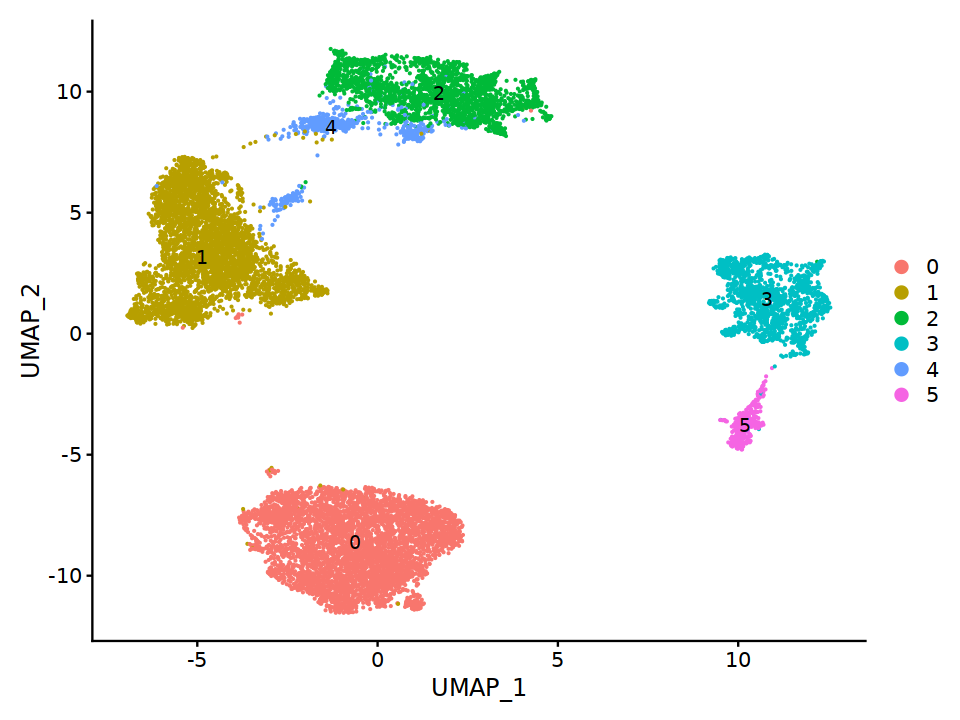

In [62]:
library(Seurat)
Idents(sce) = 'group'
table(sce$group)
#sce = subset(sce,idents = 'OS')
Idents(sce) = 'seurat_clusters'
DimPlot(sce,label = T,reduction = 'umap')

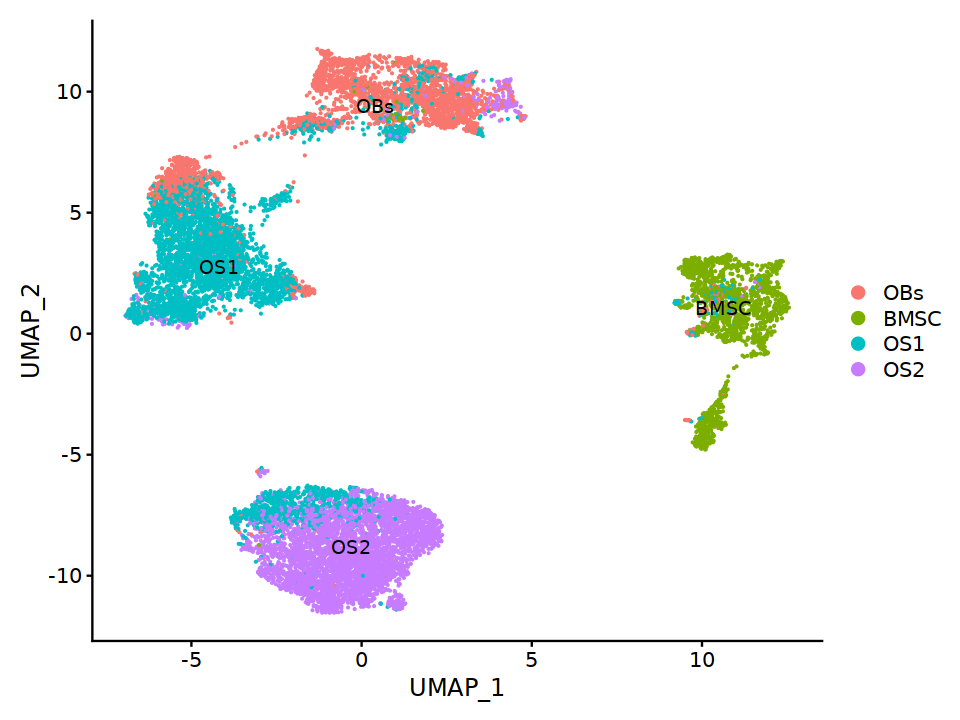

In [63]:
Idents(sce) = 'celltype'
DimPlot(sce,label = T,reduction = 'umap')

In [65]:
meta = readRDS('copykatres.rds')

In [66]:
sce1 = AddMetaData(sce,meta)

In [67]:
Idents(sce1) = 'copykat.tumor.pred'
options(repr.plot.height = 9,repr.plot.width = 8)
unique(sce1$copykat.tumor.pred)
Idents(sce1) = 'copykat.tumor.pred'
sce1 = subset(sce1,idents = c('normal','tumor cluster 1','tumor cluster 2','tumor cluster 3'))
table(sce1$copykat.tumor.pred)
sce1$copykat.tumor.pred = ifelse(sce1$copykat.tumor.pred == 'normal','diploid','aneuploid')
Idents(sce1) = 'copykat.tumor.pred'

[1] "normal"          NA                "tumor cluster 1" "tumor cluster 2"
[5] "tumor cluster 3"


         normal tumor cluster 1 tumor cluster 2 tumor cluster 3 
           9980             403            1683            1911 

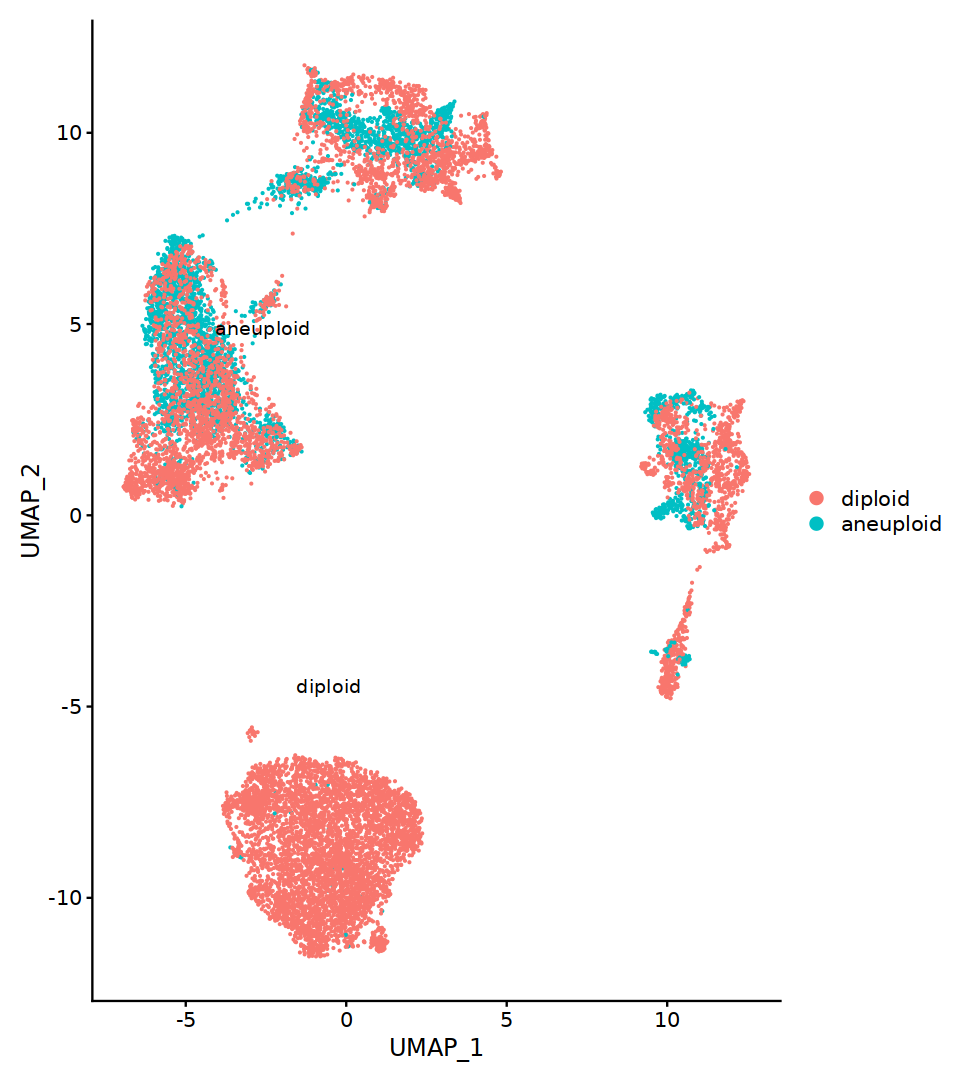

In [68]:
Idents(sce1) = 'copykat.tumor.pred'
DimPlot(sce1,label = T,reduction = 'umap')

In [69]:
table(sce1$orig.ident,sce1$celltype)

              
               BMSC  OBs  OS1  OS2
  C1              2   83    3    0
  C2              4   51    0    0
  C3              0   12    0    0
  C4              0   48    1    0
  S1            188   18    0    0
  S2            238  102    1    1
  S3            125   63    0    0
  S4            227   29    0    1
  WH2109002886  356  781  980  813
  WH2109013167  186  641 1077  384
  WH2112008442   77  409 1684 2349
  WH2201006389  244  598 1131  685
  WH2203005877   55   73   48  209

In [70]:
table(sce1$orig.ident,sce1$copykat.tumor.pred)

              
               aneuploid diploid
  C1                   0      88
  C2                   0      55
  C3                   0      12
  C4                   0      49
  S1                   0     206
  S2                   1     341
  S3                   1     187
  S4                   0     257
  WH2109002886      2045     885
  WH2109013167      1907     381
  WH2112008442        35    4484
  WH2201006389         8    2650
  WH2203005877         0     385

In [71]:
save(sce1,file = 'forslingshot.rda')

In [31]:
bb = sce 

In [32]:
library(dplyr)
library(RColorBrewer)
Idents(bb) = 'celltype'
DefaultAssay(bb) ='RNA'
data <- as(as.matrix(bb@assays$RNA@counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = bb@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)
#Construct monocle cds
monocds <- newCellDataSet(data,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())

print("format data done , filter select genes ")
#pData(monocds)$Cluster<-as.factor(pData(monocds)$celltype) 
pData(monocds)['Cluster']=bb@active.ident	
monocds <- estimateSizeFactors(monocds)
monocds <- estimateDispersions(monocds)


Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.3 GiB"


[1] "format data done , filter select genes "


Warning message:
"`group_by_()` was deprecated in dplyr 0.7.0.
i Please use `group_by()` instead.
i See vignette('programming') for more help
i The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors."
Warning message:
"`select_()` was deprecated in dplyr 0.7.0.
i Please use `select()` instead.
i The deprecated feature was likely used in the monocle package.
  Please report the issue to the authors."
Removing 691 outliers



In [40]:
cds = monocds

In [41]:
outdaa = sce

In [42]:
sce

An object of class Seurat 
22452 features across 14001 samples within 1 assay 
Active assay: RNA (22452 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, umap, tsne

In [43]:
disp_table <- dispersionTable(cds)
disp.genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id
cds <- setOrderingFilter(cds, disp.genes)

In [23]:
# var.genes <- VariableFeatures(outdaa)
# cds <- setOrderingFilter(cds, var.genes)

In [36]:
# DefaultAssay(outdaa) = 'RNA'
# Idents(outdaa) = 'seurat_clusters'
# deg.cluster <- FindAllMarkers(outdaa)
# diff.genes <- subset(deg.cluster,p_val_adj<0.01)$gene
# cds <- setOrderingFilter(cds, diff.genes)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [45]:
# disp_table <- dispersionTable(cds)
# disp.genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id

# cds <- detectGenes(cds, min_expr = 0.1)

# print(head(fData(cds)))
# expressed_genes <- row.names(subset(fData(cds), num_cells_expressed >= 50)) # nolint
# cds <- cds[expressed_genes, ]

# disp_table <- dispersionTable(cds)
# unsup_clustering_genes <- subset(
# disp_table, mean_expression >= 0.05 &
#   dispersion_empirical >= 2 * dispersion_fit
# ) #

# cds <- setOrderingFilter(cds, unsup_clustering_genes$gene_id)

### 修改形状的参数 链接 https://cloud.tencent.com/developer/article/2056834

Warning message in scale_y_log10():
"log-10 transformation introduced infinite values."


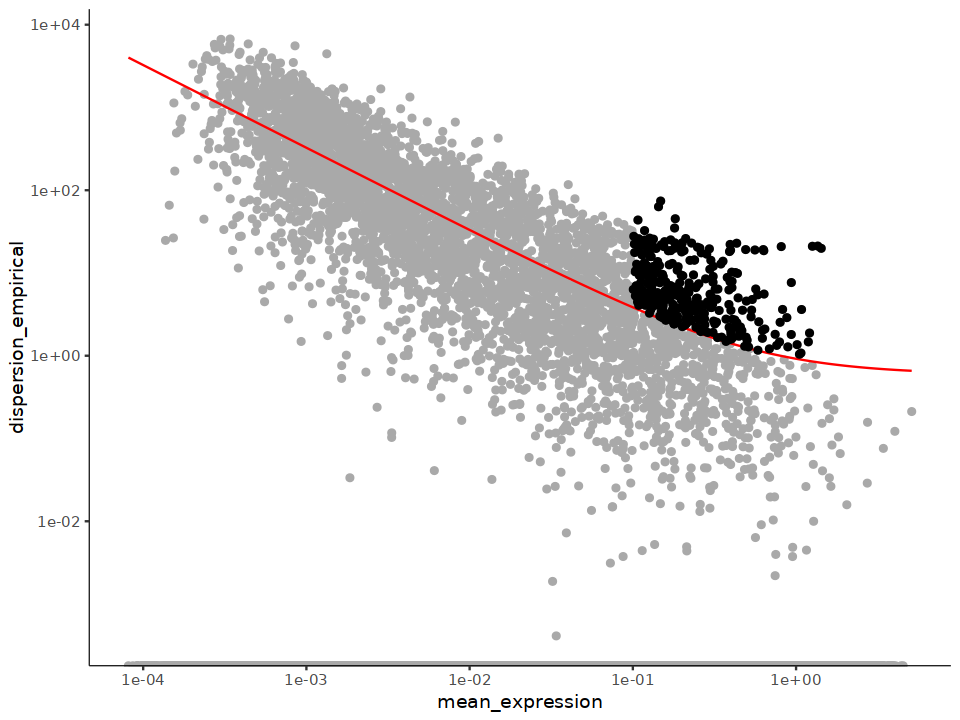

In [44]:
plot_ordering_genes(cds) 

In [45]:
cds <- reduceDimension(cds, max_components = 2, residualModelFormulaStr = "~sample", #去除样本影响
                       verbose = F, 
                       reduction_method = 'DDRTree')   # 修改method 为 reduction_method
cds <- orderCells(cds)

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"


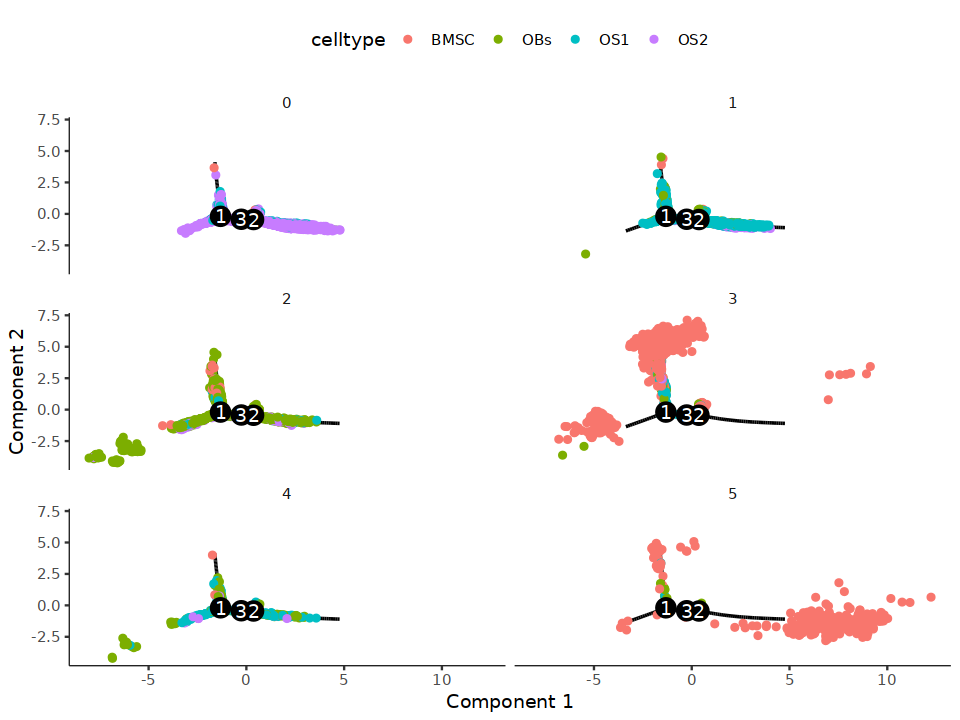

In [46]:
plot_cell_trajectory(cds, color_by = "celltype")+
  facet_wrap(~seurat_clusters, nrow = 3)